In [2]:
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [5]:
dataset = pd.read_csv('Healthcare-Diabetes.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [6]:
dataset.isnull().sum()

,0
Id,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
dataset = dataset.drop(columns=['Id'])

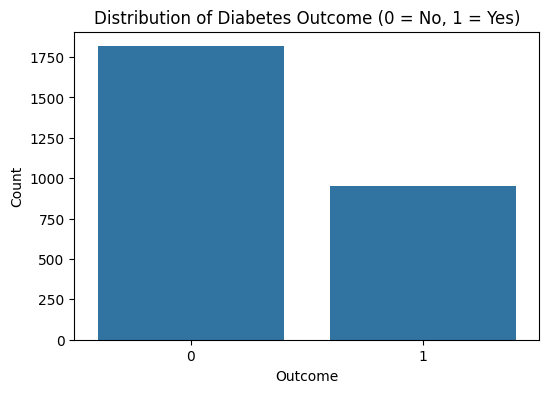

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=dataset)
plt.title('Distribution of Diabetes Outcome (0 = No, 1 = Yes)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [8]:
# This cell depends on the 'dataset' variable being defined in a previous cell.
X = dataset.iloc[:, :-1].values  # Features
y = dataset.iloc[:, -1].values   # Target

In [9]:
dataset.fillna(dataset.mean(), inplace=True)

In [10]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
model = Sequential()

In [13]:
model.add(Dense(units=512, activation='relu', input_dim=X_train.shape[1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Dropout(0.4))

In [14]:
model.add(Dense(units=512, activation='relu'))

In [15]:
model.add(Dropout(0.4))

In [16]:
model.add(Dense(units=512, activation='relu'))

In [17]:
model.add(Dense(units=1, activation='sigmoid'))

In [18]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

In [20]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)


In [21]:
history = model.fit(X_train, y_train, batch_size=64, epochs=500, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, lr_scheduler])

Epoch 1/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7079 - loss: 0.5675 - val_accuracy: 0.7671 - val_loss: 0.4676 - learning_rate: 5.0000e-04
Epoch 2/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7906 - loss: 0.4555 - val_accuracy: 0.7617 - val_loss: 0.4585 - learning_rate: 5.0000e-04
Epoch 3/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8123 - loss: 0.4172 - val_accuracy: 0.7780 - val_loss: 0.4524 - learning_rate: 5.0000e-04
Epoch 4/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8109 - loss: 0.4098 - val_accuracy: 0.7960 - val_loss: 0.4231 - learning_rate: 5.0000e-04
Epoch 5/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8039 - loss: 0.3975 - val_accuracy: 0.8339 - val_loss: 0.4100 - learning_rate: 5.0000e-04
Epoch 6/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8096 - loss: 0.4051 - val_accuracy: 0.7924 - val_loss: 0.4225 - learning_rate: 5.0000e-04
Epoch 7/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 

In [22]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [23]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [24]:
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
[[360  14]
 [  6 174]]
Accuracy: 96.39%


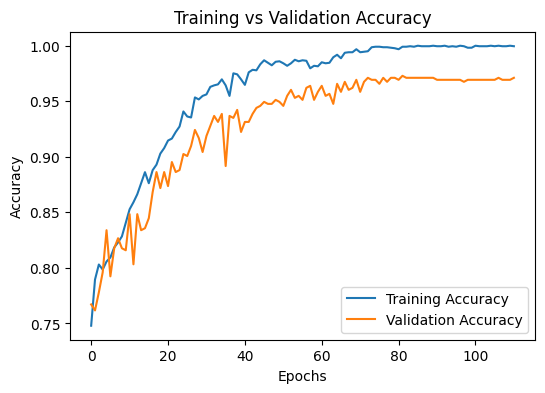

In [25]:
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


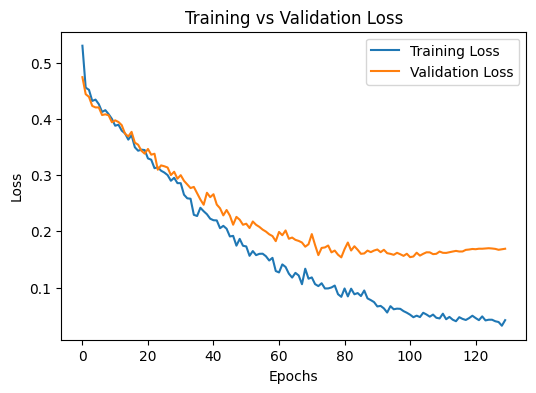

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend(loc='upper right')
plt.show()


In [28]:
filename = 'diabetes_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [29]:
with open('diabetes_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
